<a href="https://colab.research.google.com/github/LuciMatos/Film-based-Analysis/blob/Python-library/Film_based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise avaliações de filmes (MovieLens)**

>Esta análise será feita com dados relacionados a filmes e notas que usuários deram em suas avaliações.





In [1]:
import pandas as pd

## Importando o aquivo, lendo no formato csv e fazendo uma breve análise.

In [2]:
notas = pd.read_csv('/content/data/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [3]:
notas.shape

(100836, 4)

## Alterando o título da coluna.


In [4]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
notas.columns = ['usuarioID', 'filmeID', 'notas', 'momento']
notas.head()

,usuarioID,filmeID,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Explorando as avaliações.

In [6]:
notas['notas'].unique() # Todas as notas que foram dadas

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [7]:
notas['notas'].value_counts() # Quantidade de notas que foram dadas

notas
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [8]:
notas['notas'].mean() # Média das notas

3.501556983616962

<Axes: ylabel='Frequency'>

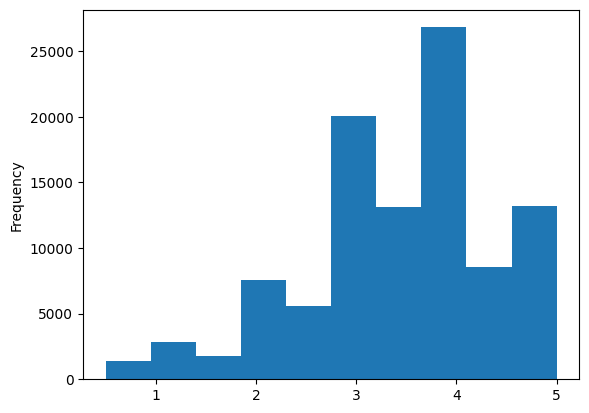

In [9]:
notas['notas'].plot(kind='hist') # Gráfico das notas. Histograma mostra a frequência das notas


In [10]:
# No gráfico conseguimos visualizar de uma forma que não seja em tabela. Porém o gráfico mostra valores aproximados. Já na tabela os valores são exatos.
# Se analisarmos esse gráfico fico difícil de destinguir qual foi a média ou a mediana das notas.

In [11]:
notas['notas'].median() # Mediana das notas

3.5

In [12]:
mediana = notas['notas'].median()
media = notas['notas'].mean()
print(f'A mediana é {mediana} e a média é {media}')

A mediana é 3.5 e a média é 3.501556983616962


In [13]:
notas['notas'].describe() # Mostra algumas informações estatísticas.

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: notas, dtype: float64

# Analisando a distribuição das notas com `Boxplot`.

> O Boxplot nos permite analisar como estão distribuidos os valores das notas, como por exemplo, mediana, média e 1° quartil.


In [14]:
import seaborn as sns

<Axes: ylabel='notas'>

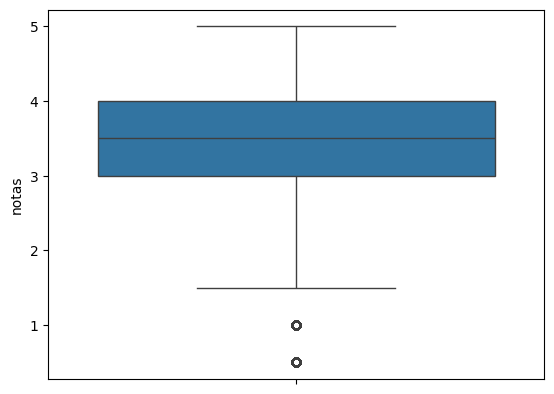

In [15]:
sns.boxplot(notas['notas'])


In [16]:
# Podemos notar que as notas estão entre 3 e 4.

# **Explorando os filmes mais acessados e avaliados.**

In [17]:
filmes = pd.read_csv('/content/data/movies.csv')
filmes.columns = ['filmeID', 'titulo', 'generos']
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
notas.head()

,usuarioID,filmeID,notas,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
notas.query('filmeID==1')['notas'].mean() # Média das notas do filme com ID 1 (Toy Story)

3.9209302325581397

In [20]:
notas.query('filmeID==2')['notas'].mean() # Média das notas do filme com ID 2 (Jumanji)

3.4318181818181817

## Agrupando as notas por filmes

In [21]:
medias_por_filme = notas.groupby('filmeID')['notas'].mean()
medias_por_filme.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: notas, dtype: float64

<Axes: ylabel='Frequency'>

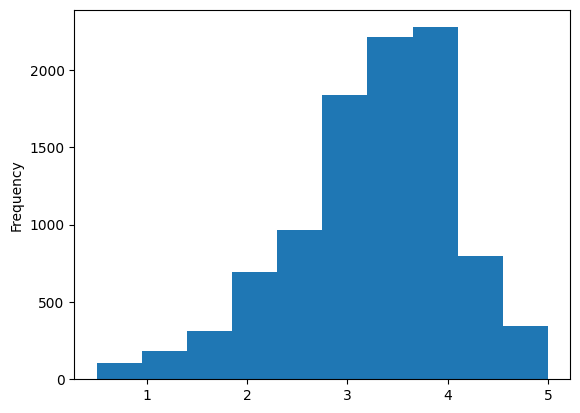

In [23]:
medias_por_filme.plot(kind='hist')


In [24]:
# Este histograma podemos ver o comportamento das notas por filme.

<Axes: ylabel='notas'>

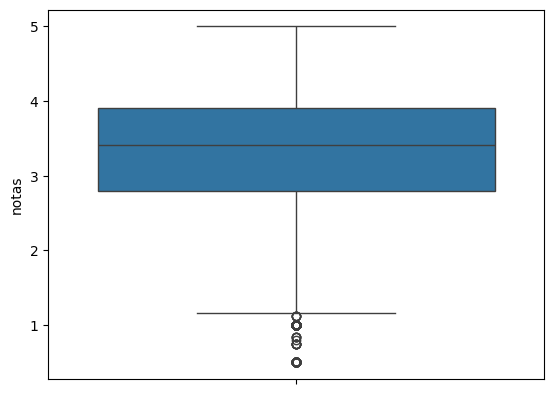

In [26]:
sns.boxplot(medias_por_filme)


In [27]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: notas, dtype: float64

In [28]:
# Com o boxplot foi possível analisar que a mediana e a distribuição dos filmes que está bem próxima de 3.5.

In [29]:
# É possível fazer um gráfico de distribuição com frequencia utilizando Seaborn.

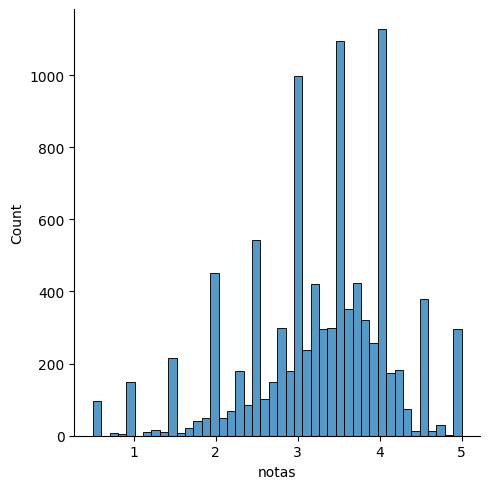

In [33]:
sns.displot(medias_por_filme) #distribuição das médias por filme


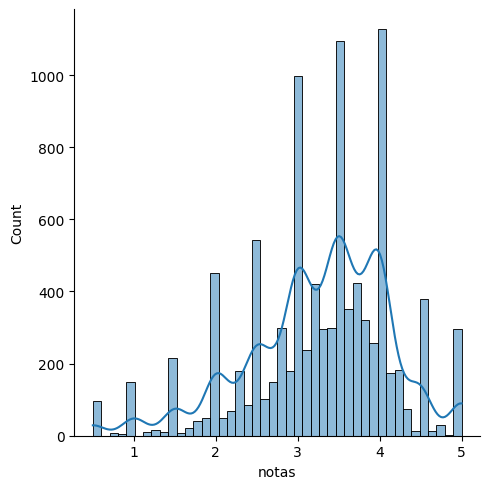

In [32]:
# Desenhando uma curva no gráfico acompanhando a distribuição.
sns.displot(medias_por_filme, kde= True)


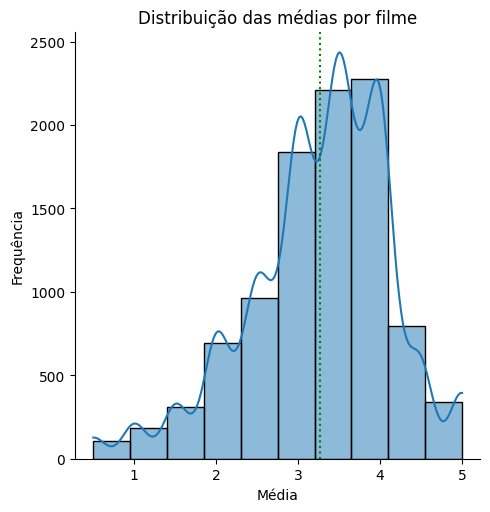

In [34]:
# Customizando o Gráfico
import matplotlib.pyplot as plt
sns.displot(medias_por_filme, kde= True, bins=10)
plt.title('Distribuição das médias por filme')
plt.xlabel('Média')
plt.ylabel('Frequência')
plt.axvline(medias_por_filme.mean(), color='green', linestyle='dotted')
plt.show()

# **Analisando base de dados filmes `TMDB`**

> Análise exploratória do faturamento dos filmes



In [35]:
tmdb = pd.read_csv('/content/data/tmdb_5000_movies.csv')
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


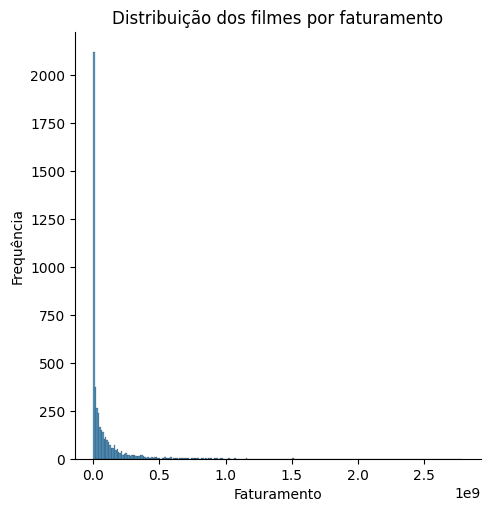

In [36]:
sns.displot(tmdb['revenue']) #Verificando o faturamento dos filmes
plt.title('Distribuição dos filmes por faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Frequência')
plt.show()

In [37]:
tmdb.info() #Analisanndo quais as informações que tem no conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [38]:
tmdb.describe() # Analisando as medidas

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [39]:
tmdb.query('revenue < 500') #Verificando o faturamento que está zerado

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7


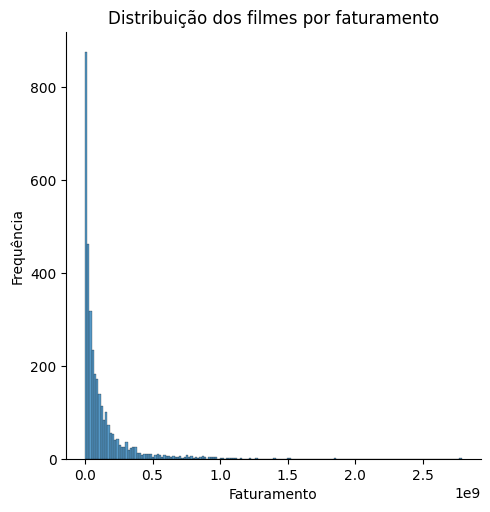

In [40]:
filmes_com_faturamento = tmdb.query('revenue > 0') # Filtrando filmes com dados coletados e faturados
sns.displot(filmes_com_faturamento['revenue'])
plt.title('Distribuição dos filmes por faturamento')
plt.xlabel('Faturamento')
plt.ylabel('Frequência')
plt.show()



### Um exemplo de como utilizar a IA codificando



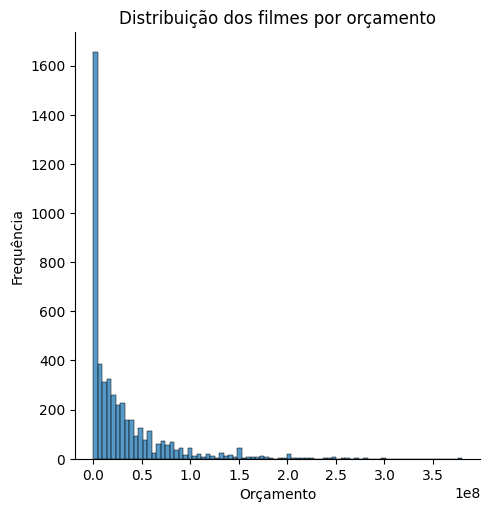

In [41]:
# prompt: gráfico de distribuição do orcamento do filme(budget)

sns.displot(tmdb['budget']) #Verificando o orçamento dos filmes
plt.title('Distribuição dos filmes por orçamento')
plt.xlabel('Orçamento')
plt.ylabel('Frequência')
plt.show()


# **Analisando os filmes de acordo com a língua original do filme.**

In [42]:
tmdb['original_language'].unique() #Unificando as opções

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [43]:
# Verificando a Moda da língua  dos filmes (Quais são os mais comuns)
tmdb['original_language'].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [44]:
# Adicionando Index
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [45]:
# Transformando em um DataFrame
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()

# Alterando o titulo das colunas
contagem_de_linguas.columns = ['original_language', 'total']
contagem_de_linguas.head(10)

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


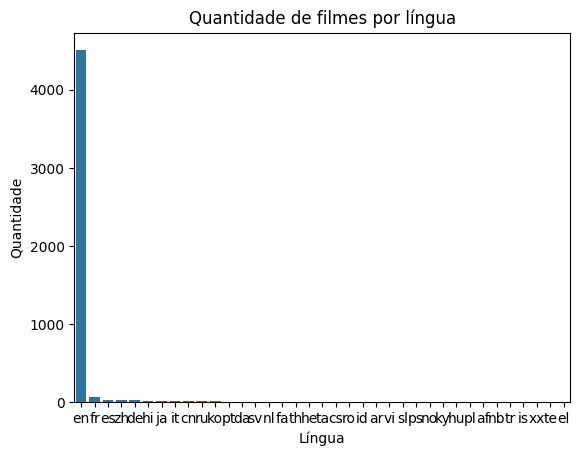

In [46]:
sns.barplot( data = contagem_de_linguas, x = 'original_language', y = 'total')
plt.title('Quantidade de filmes por língua')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

In [47]:
# O gráfico de barras (barplot) não é muito interessante neste caso que queremos analisar colunas categóricas.
# Para isso será utilizado o countplot pois esse gráfico é similar ao de barras, porém ele irá contar as ocorrências automaticamente.

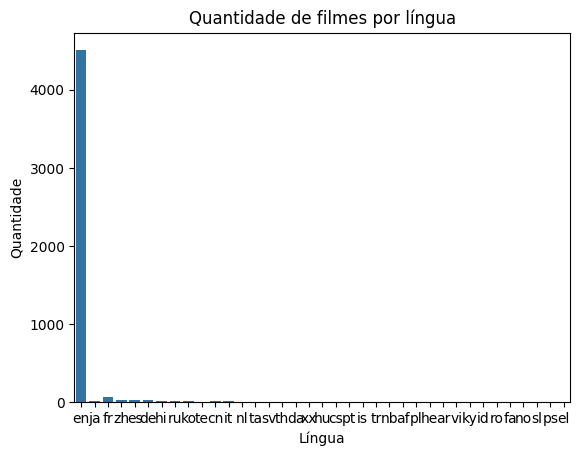

In [48]:
sns.countplot(data = tmdb, x = 'original_language')
plt.title('Quantidade de filmes por língua')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()


In [49]:
# Separando os filmes de língua Inglesa dos demais.
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_outros = total_geral - total_ingles
print(total_geral, total_ingles, total_outros)

4803 4505 298


In [50]:
# Criando um dataframe desses dados
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_ingles, total_outros]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


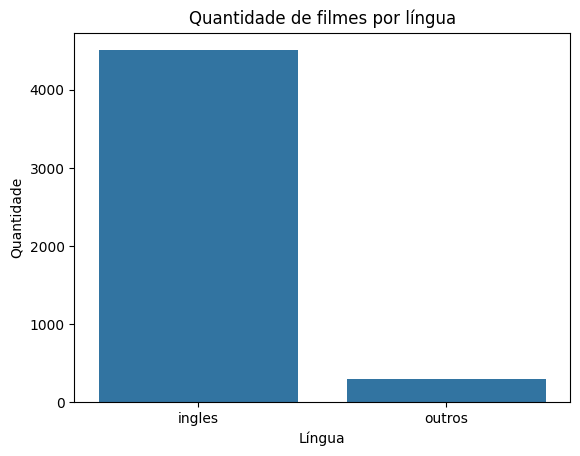

In [51]:
# Usando um gráfico para visualizar melhor a distribuição.
sns.barplot(data = dados, x = 'lingua', y = 'total')
plt.title('Quantidade de filmes por língua')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()


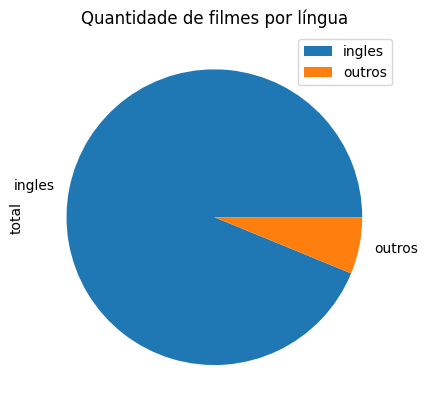

In [52]:
# Verificando os dados com gráfico de pizza. Porém ainda assim esse gráfico não mostra os valores.
dados.plot(kind='pie', y= 'total', labels=dados['lingua'])
plt.title('Quantidade de filmes por língua')
plt.show()

In [53]:
total_outras_linguas = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_outras_linguas.head(10)

original_language
fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
Name: count, dtype: int64

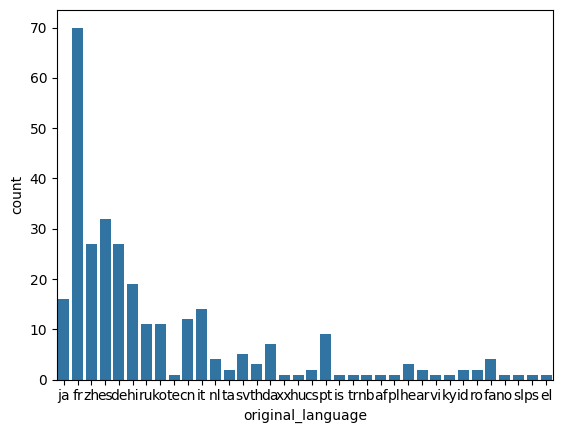

In [54]:
sns.countplot(data = tmdb.query('original_language != "en"'),
              x='original_language')
plt.show()

# **Ajustando o visual do gráfico.**

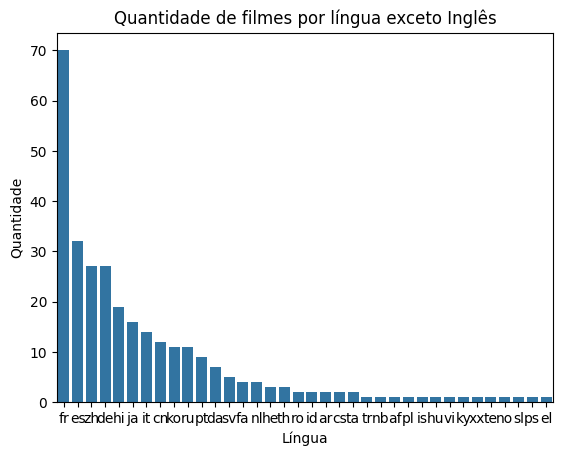

In [55]:
# Ordenando as barras por língua
sns.countplot(data = tmdb, x = 'original_language', order = total_outras_linguas.index)
plt.title('Quantidade de filmes por língua exceto Inglês')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

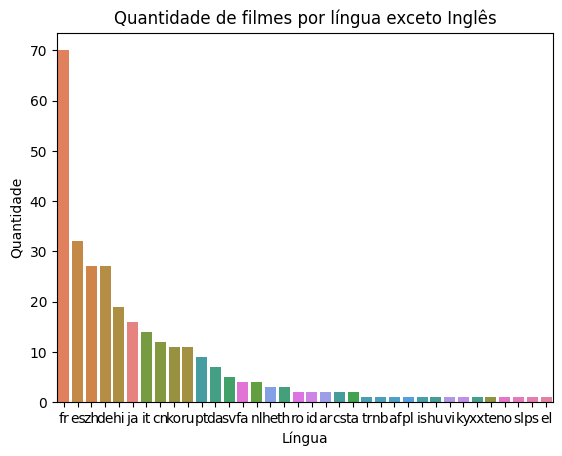

In [56]:
# Alterando as cores
sns.countplot(data = tmdb, x = 'original_language', order= total_outras_linguas.index, hue='original_language')
plt.title('Quantidade de filmes por língua exceto Inglês')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

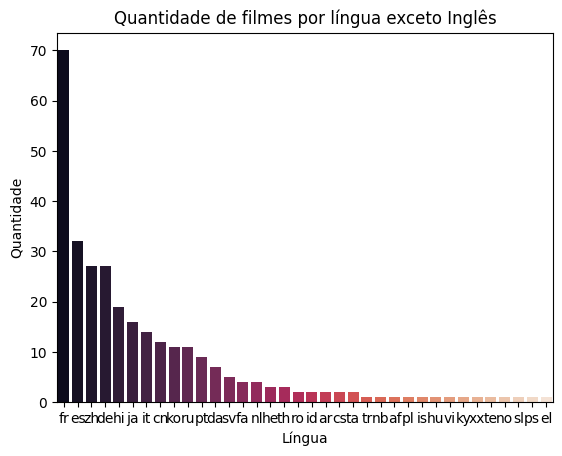

In [57]:
# Passando as cores com uma tonalidade de alto pra baixo.
sns.countplot(data = tmdb, x = 'original_language', order= total_outras_linguas.index, hue='original_language',
              palette='rocket', hue_order=total_outras_linguas.index)
plt.title('Quantidade de filmes por língua exceto Inglês')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

# O order ordena de diversas formas, como do maior para o menos, ordem alfabética.
# O hue defini qual a coluna da tabela que será definida a cor

In [58]:
# Para não mostrar apenas o número exato, como por exemplo o 70 do Francês ser o dobro do Espanhol sendo do total, vamos verificar qual
#a porcentagem dos valores relativos ou proporcional

tmdb.query('original_language != "en"')['original_language'].value_counts(normalize=True)

original_language
fr    0.234899
es    0.107383
zh    0.090604
de    0.090604
hi    0.063758
ja    0.053691
it    0.046980
cn    0.040268
ko    0.036913
ru    0.036913
pt    0.030201
da    0.023490
sv    0.016779
fa    0.013423
nl    0.013423
he    0.010067
th    0.010067
ro    0.006711
id    0.006711
ar    0.006711
cs    0.006711
ta    0.006711
tr    0.003356
nb    0.003356
af    0.003356
pl    0.003356
is    0.003356
hu    0.003356
vi    0.003356
ky    0.003356
xx    0.003356
te    0.003356
no    0.003356
sl    0.003356
ps    0.003356
el    0.003356
Name: proportion, dtype: float64

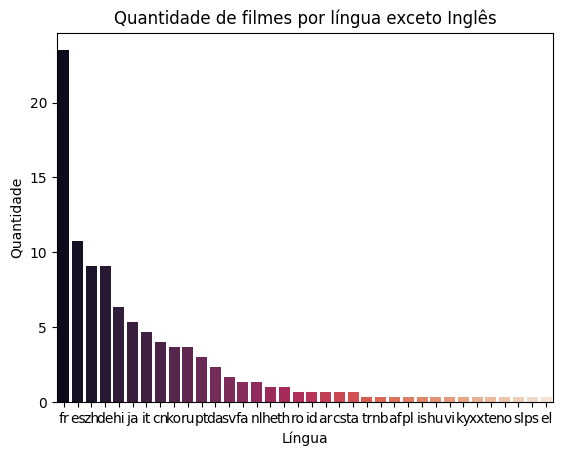

In [59]:
# Dristribuição por percentual.

sns.countplot(data = tmdb.query('original_language != "en"'), order= total_outras_linguas.index,
              hue= 'original_language', x = 'original_language',
              palette='rocket', hue_order=total_outras_linguas.index,
              stat="percent")
plt.title('Quantidade de filmes por língua exceto Inglês')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

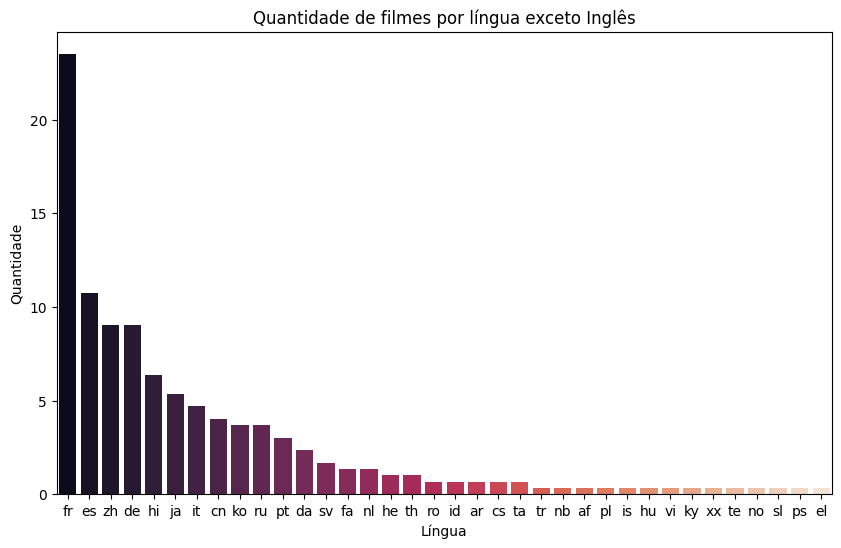

In [60]:
# Aumentando a legenda do gráfico

plt.figure(figsize=(10, 6)) # Aumentando o tamanho do gráfico
sns.countplot(data = tmdb.query('original_language != "en"'), order= total_outras_linguas.index,
              hue= 'original_language', x = 'original_language',
              palette='rocket', hue_order=total_outras_linguas.index,
              stat="percent")
plt.title('Quantidade de filmes por língua exceto Inglês')
plt.xlabel('Língua')
plt.ylabel('Quantidade')
plt.show()

# **Estatística dos dados.**

>  **Medidas de tendência central e desvio padrão.**



In [61]:
filmes.head()


,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [68]:
#Extraindo a media das notas dos dois primeiros filmes em variáveis distintas
notas_toy_story = notas.query('filmeID == 1')['notas']
notas_jumanji = notas.query('filmeID == 2')['notas']

media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

print(media_toy_story, media_jumanji)

3.9209302325581397 3.4318181818181817


In [69]:
# Analisando somente as médias não fica claro pois as distribuição das notas podem ser completamente diferente, não tem como saber
# olhando apenas para a média, porque ela é um valor central, logo não é possível analisar a distribuição dos valores.

In [70]:
# Extraindo a mediana das notas dos dois primeiros filmes
mediana_toy_story = notas_toy_story.median()
mediana_jumanji = notas_jumanji.median()

print(mediana_toy_story, mediana_jumanji)


4.0 3.5


In [71]:
# Nota-se que a média e a mediana são aproximadas o que não mostra como estão distribuidas.


In [73]:
# Analisando a distribuição de outra forma usando o Numpy
import numpy as np

In [74]:
# Verificando o desvio padrão para ver como a média foi desviada.
desvio_toy_story = notas_toy_story.std()
desvio_jumanji = notas_jumanji.std()

print(desvio_toy_story, desvio_jumanji)

0.8348591407114047 0.8817134921476455


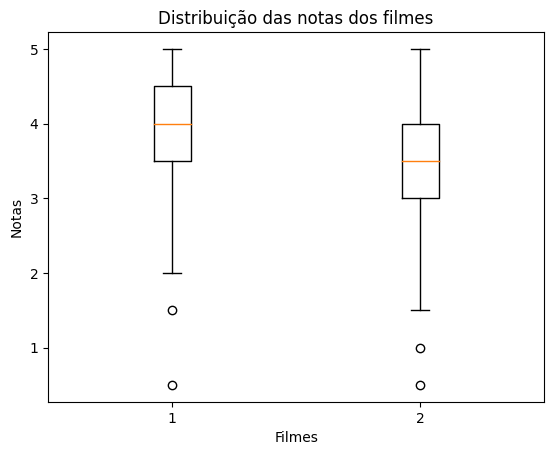

In [77]:
# Verificando no gráfico como está distribuida a média e a mediana.
plt.boxplot([notas_toy_story, notas_jumanji])
plt.title('Distribuição das notas dos filmes')
plt.xlabel('Filmes')
plt.ylabel('Notas')
plt.show()


<ipython-input-92-095463a318ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = notas.query('filmeID in [1,2]'), x = 'filmeID', y = 'notas', palette='Set2')


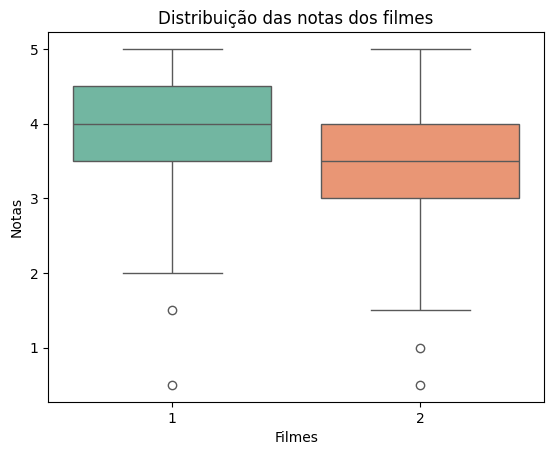

In [92]:
sns.boxplot(data = notas.query('filmeID in [1,2]'), x = 'filmeID', y = 'notas', palette='Set2')
plt.title('Distribuição das notas dos filmes')
plt.xlabel('Filmes')
plt.ylabel('Notas')
plt.show()

In [93]:
# Conclusão - O conceito dessas medidas como média e mediana mostra que o conjunto de dados têm a mesma média e a mesma mediana, só que completamente diferentes.
# Existem outros exemplos de dados que possuem a mesma medida de resuma, mas são completamente diferentes em suas distribuições.
# É importante estar atento a esses dados. Quando for feita a análise e a comparação do conjunto de dados, precisamos de mais do que a média, mediana ou moda, mas o desvio padrão
# também é importante para a análise.